# Presentación Final

Marilé González Maldonado
A00826863

La siguiente base de datos contiene información recuadados en una encuesta sobre estudiantes de una preparatoria. Contiene información que se puede utilizar para hacer estudios del tipo sociales. Esta base de datos, con la que trabajé en este reporte, contiene datos  recaudados en encuestas de jóvenes de rango de edad de 15-22, incluyen datos como tiempo libre, horas dedicadas de estudio, su relacion con los padres, con quienes habita, si tienen acceso a internet o no, si piensan continuar sus estudios, entre otros.

# Descripción de las variables

Las variables son en su mayoría del tipo cuantitativa que se le asigna una categória como por ejemplo: 1 como muy poco/malo y 5 como mucho/bueno

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

In [1]:
#Se cargan las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Cargar archivo
df=pd.read_csv('datasets/student.csv')
df.columns #muestra los nombres de las columnas

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [3]:

df.tail(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


# Cambio nombres de columnas

In [4]:

df.rename(columns= {
    'Medu':'Mothers education',
    'Fedu':'Fathers education',
    'Famrel':'Family relations',
    'Walc':'Alcohol consumption',
},
         inplace=True
         )
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Mothers education', 'Fathers education', 'Mjob', 'Fjob', 'reason',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Alcohol consumption', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Se pueden observar los cambios en los nombres de las columnas



In [5]:
df.age.describe()


count    649.000000
mean      16.744222
std        1.218138
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64


En la tabla de arriba podemos observar que estos datos son recaudados de 649 
estudiantes de las edades de 15 a 22, el promedio de sus edades es de 17.

En la tabla inferior podemos observar que en promedio de faltas hay 4 y que
hay un procentaje gran de alumnos que faltan 6 veces, pero que llegan a haber
32 inasistencias por parte de un alumno.

In [6]:
df.absences.describe()


count    649.000000
mean       3.659476
std        4.640759
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       32.000000
Name: absences, dtype: float64

In [14]:
df.pivot_table('freetime', 'age',aggfunc=np.mean)

,freetime
age,
15,3.258929
16,3.135593
17,3.206704
18,3.071429
19,3.468750
20,3.166667
21,3.000000
22,4.000000


En la tabla superior podemos observar que el promedio de mayor tiempo libre
corresponde a los jóvenes de las edades 22 consideranndo 4 =como mucho tiempo libre 
y los de 19 con 3.5

In [30]:
df.pivot_table('absences','age',aggfunc=np.mean)

,absences
age,
15,2.919643
16,2.960452
17,4.083799
18,4.178571
19,4.187500
20,6.833333
21,10.500000
22,12.000000


Aquí se puede observar que con el paso de los años el promedio de faltas va aumentando.

In [33]:
df.pivot_table('Alcohol consumption','sex',aggfunc=np.mean)

,Alcohol consumption
sex,
F,1.937337
M,2.774436


Aquí se puede observar que el consumo de alcohol es mayor en hombres.

# Gráficas


# Pregunta: ¿Qué tanto tiempo le dedican los jóvenes al estudio?


¿Es por el poco tiempo libre que tienen?

En el siguiente histograma se puede observar que alrededor
de 300 estudiantes le dedican 2 horas al estudio y menos de 50
le dedican aproximadamente 4 horas

Text(0.5, 1.0, 'Study time')

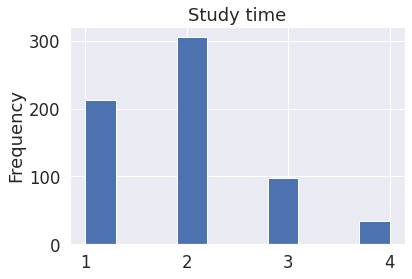

In [25]:
df['studytime'].plot(kind='hist')
plt.title('Study time')


Aquí se puede observar en siguiente histograma que a comparacion con el tiempo libre
los jóvenes consideran que se tienen tiempo libre, marcando como 1 = muy poco tiempo libre 
y 5 = mucho tiempo libre



Text(0.5, 1.0, 'Free time')

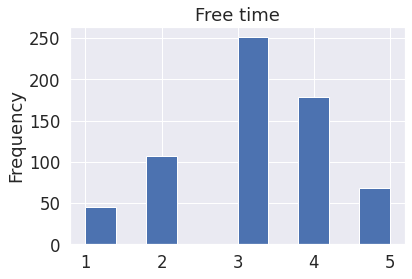

In [26]:
df['freetime'].plot(kind='hist')
plt.title('Free time')

# Pregunta ¿El alcohol representa problema para los estudiantes?

En el siguiente histograma podemos observar que en promedio su consumo de alcohol de fin de semana es arriba de la media. En la segunda gráfica podemos observar que en su mayoría los hombres comienzan a consumir alcohol a más temprana edad y cuando más consumen alcohol es de 15-18


Text(0.5, 1.0, 'Weekend alcohol consumption')

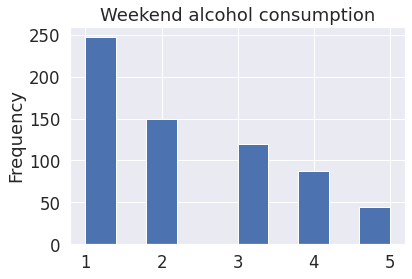

In [27]:
df['Alcohol consumption'].plot(kind='hist')
plt.title('Weekend alcohol consumption')

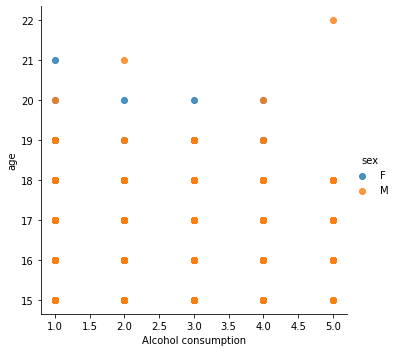

In [21]:
sns.lmplot(
        x='Alcohol consumption',
        y='age',
        data=df,
        fit_reg=False,
        hue='sex'
)

plt.show()

En el siguiente boxplot podemos observar que consideran tener buena salud arriba de lo que se considera media



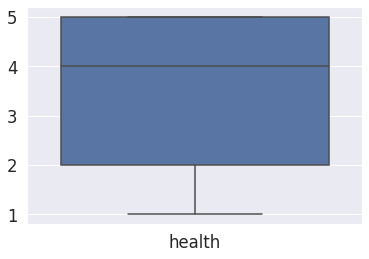

<Figure size 720x360 with 0 Axes>

In [36]:

sns.boxplot(data=df.loc[:,['health']])
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
plt.show()

In [23]:
df.corr(method="pearson")

,age,Mothers education,Fathers education,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Alcohol consumption,health,absences,G1,G2,G3
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
Mothers education,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fathers education,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719


Con la tabla que vemos en la parte superior se pueden observar las correlaciones entre 
las variables de la base de datos, siendo el valor cercano a 1 o -1 se puede afirmar que existe 
correlacion lineal. Y podemos observar que no existen muchas relaciones significativas, en la tabla de abajo
podemos observar lo mismo pero ahora con colores y de manera más visual.


Aquí en la parte superior podemos observar el análisis 
de pearson de correlación entre las variables


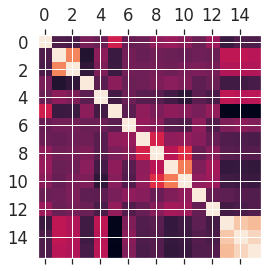

In [24]:
plt.matshow(df.corr())

# Conclusiones



En conclusión realizar carga de archivos y poder hacer uso de Python para su análisis es una forma muy sencilla y dinámica de poder observar el comportamiento de los datos. Con estos análisis y planteandonos algunas preguntas podemos ser capaces de observar el por qué puede que esté sucediendo algo en una sociedad o dentro de una organización. Esto nos permite también detectar problematicas y basandonos en los resultados poder buscar aplicar una solución fundamentada con infromación proveniente de los datos. 

Esta base de datos, con la que trabajé en este reporte, contiene datos  recaudados en encuestas de jóvenes de rango de edad de 15-22, con estos datos se pueden hacer mucho análisis del tipo social ya que incluyen datos como tiempo libre, horas dedicadas de estudio, su relacion con los padres, con quienes habita, si tienen acceso a internet o no, si piensan continuar sus estudios, entre otros.

Se puede observar con los análisis gráficos que se realizaron que los jóvenes podrían dedicarle un 
poco más de tiempo al estudio ya que en su mayoría los estudiantes consideran que si tienen buena cantidad de tiempo
libre. El alcohol representa un problema para los jóvenes ya que el rango de edad se consideran que beben
mucho los fines de semana, se observa que el consumo de alcohol se centra más en lo hombres. También se puede observar que el número de faltas con el paso de los años va en aumento, al igual que va en aumento las horas dedicadas al estudio.